In [1]:
from IPython.core.display import display,HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Sonar Use Case

Sound Navigation And Ranging(SONAR) technique for dtecting and determining the distance and direction of underwater objects by acoustic means.

# Data Description

The task is to train the network to discriminate between sonar signals bounced off a metal cylinder and those bounced off roughly cylinderical rock.
The dataset contins 111 patterns obtained by bouncing sonar signals off a metal cylinder at various angel and under various conditions.
Each patterns is a set of 60 numbers int the range 0.0 to 1.0.
Each number represents the energy within a particural frequency band,integrated over a certain period of time.

# Target

# Some important observation from data description

1.As entire data is within same range(0.0 to 1.0),we do not need to scale the data.
2.Total numbers of columns are 61.It is not a huge number of columns so no need to use PCA as well.

In [2]:
#importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [4]:
#loding the data set
import pandas as pd
df=pd.read_csv('sonar.csv')
df.head()

V1      V2      V3      V4      V5      V6      V7      V8      V9  \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

      V10  ...     V52     V53     V54     V55     V56     V57     V58  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

      V59     V60  Class  
0  0.0090  0.0032      R  
1  0.0052  0.0044      R  
2  0.0095  0.0078      R  
3  0.0040  0.0117      R  
4  0.0107  0.0094      R  

[5 rows x 61 columns]

In [5]:
df.sample(8)

V1      V2      V3      V4      V5      V6      V7      V8      V9  \
39   0.0091  0.0213  0.0206  0.0505  0.0657  0.0795  0.0970  0.0872  0.0743   
130  0.0443  0.0446  0.0235  0.1008  0.2252  0.2611  0.2061  0.1668  0.1801   
99   0.0201  0.0423  0.0554  0.0783  0.0620  0.0871  0.1201  0.2707  0.1206   
118  0.0363  0.0478  0.0298  0.0210  0.1409  0.1916  0.1349  0.1613  0.1703   
27   0.0177  0.0300  0.0288  0.0394  0.0630  0.0526  0.0688  0.0633  0.0624   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
8    0.0223  0.0375  0.0484  0.0475  0.0647  0.0591  0.0753  0.0098  0.0684   
166  0.0411  0.0277  0.0604  0.0525  0.0489  0.0385  0.0611  0.1117  0.1237   

        V10  ...     V52     V53     V54     V55     V56     V57     V58  \
39   0.0837  ...  0.0112  0.0112  0.0102  0.0026  0.0097  0.0098  0.0043   
130  0.3083  ...  0.0274  0.0205  0.0141  0.0185  0.0055  0.0045  0.0115   
99   0.0279  ...  0.0191  0.0182  0.0160  0.0290  0.0090  0.0242  0.0224   
118  0.1444  ...  0.0115  0.0190  0.0055  0.0096  0.0050  0.0066  0.0114   
27   0.0613  ...  0.0102  0.0122  0.0044  0.0075  0.0124  0.0099  0.0057   
4    0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   
8    0.1487  ...  0.0145  0.0128  0.0145  0.0058  0.0049  0.0065  0.0093   
166  0.2300  ...  0.0217  0.0038  0.0019  0.0065  0.0132  0.0108  0.0050   

        V59     V60  Class  
39   0.0071  0.0108      R  
130  0.0152  0.0100      M  
99   0.0190  0.0096      M  
118  0.0073  0.0033      M  
27   0.0032  0.0019      R  
4    0.0107  0.0094      R  
8    0.0059  0.0022      R  
166  0.0085  0.0044      M  

[8 rows x 61 columns]

In [7]:
df.shape

(208, 61)

In [8]:
df.dtypes

V1       float64
V2       float64
V3       float64
V4       float64
V5       float64
          ...   
V57      float64
V58      float64
V59      float64
V60      float64
Class     object
Length: 61, dtype: object

In [9]:
pd.set_option('display.max_rows',None)

In [10]:
df

V1      V2      V3      V4      V5      V6      V7      V8      V9  \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
5    0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
6    0.0317  0.0956  0.1321  0.1408  0.1674  0.1710  0.0731  0.1401  0.2083   
7    0.0519  0.0548  0.0842  0.0319  0.1158  0.0922  0.1027  0.0613  0.1465   
8    0.0223  0.0375  0.0484  0.0475  0.0647  0.0591  0.0753  0.0098  0.0684   
9    0.0164  0.0173  0.0347  0.0070  0.0187  0.0671  0.1056  0.0697  0.0962   
10   0.0039  0.0063  0.0152  0.0336  0.0310  0.0284  0.0396  0.0272  0.0323   
11   0.0123  0.0309  0.0169  0.0313  0.0358  0.0102  0.0182  0.0579  0.1122   
12   0.0079  0.0086  0.0055  0.0250  0.0344  0.0546  0.0528  0.0958  0.1009   
13   0.0090  0.0062  0.0253  0.0489  0.1197  0.1589  0.1392  0.0987  0.0955   
14   0.0124  0.0433  0.0604  0.0449  0.0597  0.0355  0.0531  0.0343  0.1052   
15   0.0298  0.0615  0.0650  0.0921  0.1615  0.2294  0.2176  0.2033  0.1459   
16   0.0352  0.0116  0.0191  0.0469  0.0737  0.1185  0.1683  0.1541  0.1466   
17   0.0192  0.0607  0.0378  0.0774  0.1388  0.0809  0.0568  0.0219  0.1037   
18   0.0270  0.0092  0.0145  0.0278  0.0412  0.0757  0.1026  0.1138  0.0794   
19   0.0126  0.0149  0.0641  0.1732  0.2565  0.2559  0.2947  0.4110  0.4983   
20   0.0473  0.0509  0.0819  0.1252  0.1783  0.3070  0.3008  0.2362  0.3830   
21   0.0664  0.0575  0.0842  0.0372  0.0458  0.0771  0.0771  0.1130  0.2353   
22   0.0099  0.0484  0.0299  0.0297  0.0652  0.1077  0.2363  0.2385  0.0075   
23   0.0115  0.0150  0.0136  0.0076  0.0211  0.1058  0.1023  0.0440  0.0931   
24   0.0293  0.0644  0.0390  0.0173  0.0476  0.0816  0.0993  0.0315  0.0736   
25   0.0201  0.0026  0.0138  0.0062  0.0133  0.0151  0.0541  0.0210  0.0505   
26   0.0151  0.0320  0.0599  0.1050  0.1163  0.1734  0.1679  0.1119  0.0889   
27   0.0177  0.0300  0.0288  0.0394  0.0630  0.0526  0.0688  0.0633  0.0624   
28   0.0100  0.0275  0.0190  0.0371  0.0416  0.0201  0.0314  0.0651  0.1896   
29   0.0189  0.0308  0.0197  0.0622  0.0080  0.0789  0.1440  0.1451  0.1789   
30   0.0240  0.0218  0.0324  0.0569  0.0330  0.0513  0.0897  0.0713  0.0569   
31   0.0084  0.0153  0.0291  0.0432  0.0951  0.0752  0.0414  0.0259  0.0692   
32   0.0195  0.0213  0.0058  0.0190  0.0319  0.0571  0.1004  0.0668  0.0691   
33   0.0442  0.0477  0.0049  0.0581  0.0278  0.0678  0.1664  0.1490  0.0974   
34   0.0311  0.0491  0.0692  0.0831  0.0079  0.0200  0.0981  0.1016  0.2025   
35   0.0206  0.0132  0.0533  0.0569  0.0647  0.1432  0.1344  0.2041  0.1571   
36   0.0094  0.0166  0.0398  0.0359  0.0681  0.0706  0.1020  0.0893  0.0381   
37   0.0333  0.0221  0.0270  0.0481  0.0679  0.0981  0.0843  0.1172  0.0759   
38   0.0123  0.0022  0.0196  0.0206  0.0180  0.0492  0.0033  0.0398  0.0791   
39   0.0091  0.0213  0.0206  0.0505  0.0657  0.0795  0.0970  0.0872  0.0743   
40   0.0068  0.0232  0.0513  0.0444  0.0249  0.0637  0.0422  0.1130  0.1911   
41   0.0093  0.0185  0.0056  0.0064  0.0260  0.0458  0.0470  0.0057  0.0425   
42   0.0211  0.0319  0.0415  0.0286  0.0121  0.0438  0.1299  0.1390  0.0695   
43   0.0093  0.0269  0.0217  0.0339  0.0305  0.1172  0.1450  0.0638  0.0740   
44   0.0257  0.0447  0.0388  0.0239  0.1315  0.1323  0.1608  0.2145  0.0847   
45   0.0408  0.0653  0.0397  0.0604  0.0496  0.1817  0.1178  0.1024  0.0583   
46   0.0308  0.0339  0.0202  0.0889  0.1570  0.1750  0.0920  0.1353  0.1593   
47   0.0373  0.0281  0.0232  0.0225  0.0179  0.0733  0.0841  0.1031  0.0993   
48   0.0190  0.0038  0.0642  0.0452  0.0333  0.0690  0.0901  0.1454  0.0740   
49   0.0119  0.0582  0.0623  0.0600  0.1397  0.1883  0.1422

In [11]:
df.dtypes

V1       float64
V2       float64
V3       float64
V4       float64
V5       float64
V6       float64
V7       float64
V8       float64
V9       float64
V10      float64
V11      float64
V12      float64
V13      float64
V14      float64
V15      float64
V16      float64
V17      float64
V18      float64
V19      float64
V20      float64
V21      float64
V22      float64
V23      float64
V24      float64
V25      float64
V26      float64
V27      float64
V28      float64
V29      float64
V30      float64
V31      float64
V32      float64
V33      float64
V34      float64
V35      float64
V36      float64
V37      float64
V38      float64
V39      float64
V40      float64
V41      float64
V42      float64
V43      float64
V44      float64
V45      float64
V46      float64
V47      float64
V48      float64
V49      float64
V50      float64
V51      float64
V52      float64
V53      float64
V54      float64
V55      float64
V56      float64
V57      float64
V58      float64
V59      float

In [13]:
df.isnull().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
V29      0
V30      0
V31      0
V32      0
V33      0
V34      0
V35      0
V36      0
V37      0
V38      0
V39      0
V40      0
V41      0
V42      0
V43      0
V44      0
V45      0
V46      0
V47      0
V48      0
V49      0
V50      0
V51      0
V52      0
V53      0
V54      0
V55      0
V56      0
V57      0
V58      0
V59      0
V60      0
Class    0
dtype: int64

In [14]:
df.isnull().sum().sum()

0

In [18]:
df.describe().T

count      mean       std     min       25%      50%       75%     max
V1   208.0  0.029164  0.022991  0.0015  0.013350  0.02280  0.035550  0.1371
V2   208.0  0.038437  0.032960  0.0006  0.016450  0.03080  0.047950  0.2339
V3   208.0  0.043832  0.038428  0.0015  0.018950  0.03430  0.057950  0.3059
V4   208.0  0.053892  0.046528  0.0058  0.024375  0.04405  0.064500  0.4264
V5   208.0  0.075202  0.055552  0.0067  0.038050  0.06250  0.100275  0.4010
V6   208.0  0.104570  0.059105  0.0102  0.067025  0.09215  0.134125  0.3823
V7   208.0  0.121747  0.061788  0.0033  0.080900  0.10695  0.154000  0.3729
V8   208.0  0.134799  0.085152  0.0055  0.080425  0.11210  0.169600  0.4590
V9   208.0  0.178003  0.118387  0.0075  0.097025  0.15225  0.233425  0.6828
V10  208.0  0.208259  0.134416  0.0113  0.111275  0.18240  0.268700  0.7106
V11  208.0  0.236013  0.132705  0.0289  0.129250  0.22480  0.301650  0.7342
V12  208.0  0.250221  0.140072  0.0236  0.133475  0.24905  0.331250  0.7060
V13  208.0  0.273305  0.140962  0.0184  0.166125  0.26395  0.351250  0.7131
V14  208.0  0.296568  0.164474  0.0273  0.175175  0.28110  0.386175  0.9970
V15  208.0  0.320201  0.205427  0.0031  0.164625  0.28170  0.452925  1.0000
V16  208.0  0.378487  0.232650  0.0162  0.196300  0.30470  0.535725  0.9988
V17  208.0  0.415983  0.263677  0.0349  0.205850  0.30840  0.659425  1.0000
V18  208.0  0.452318  0.261529  0.0375  0.242075  0.36830  0.679050  1.0000
V19  208.0  0.504812  0.257988  0.0494  0.299075  0.43495  0.731400  1.0000
V20  208.0  0.563047  0.262653  0.0656  0.350625  0.54250  0.809325  1.0000
V21  208.0  0.609060  0.257818  0.0512  0.399725  0.61770  0.816975  1.0000
V22  208.0  0.624275  0.255883  0.0219  0.406925  0.66490  0.831975  1.0000
V23  208.0  0.646975  0.250175  0.0563  0.450225  0.69970  0.848575  1.0000
V24  208.0  0.672654  0.239116  0.0239  0.540725  0.69850  0.872175  1.0000
V25  208.0  0.675424  0.244926  0.0240  0.525800  0.72110  0.873725  1.0000
V26  208.0  0.699866  0.237228  0.0921  0.544175  0.75450  0.893800  1.0000
V27  208.0  0.702155  0.245657  0.0481  0.531900  0.74560  0.917100  1.0000
V28  208.0  0.694024  0.237189  0.0284  0.534775  0.73190  0.900275  1.0000
V29  208.0  0.642074  0.240250  0.0144  0.463700  0.68080  0.852125  1.0000
V30  208.0  0.580928  0.220749  0.0613  0.411400  0.60715  0.735175  1.0000
V31  208.0  0.504475  0.213992  0.0482  0.345550  0.49035  0.641950  0.9657
V32  208.0  0.439040  0.213237  0.0404  0.281400  0.42960  0.580300  0.9306
V33  208.0  0.417220  0.206513  0.0477  0.257875  0.39120  0.556125  1.0000
V34  208.0  0.403233  0.231242  0.0212  0.217575  0.35105  0.596125  0.9647
V35  208.0  0.392571  0.259132  0.0223  0.179375  0.31275  0.593350  1.0000
V36  208.0  0.384848  0.264121  0.0080  0.154350  0.32115  0.556525  1.0000
V37  208.0  0.363807  0.239912  0.0351  0.160100  0.30630  0.518900  0.9497
V38  208.0  0.339657  0.212973  0.0383  0.174275  0.31270  0.440550  1.0000
V39  208.0  0.325800  0.199075  0.0371  0.173975  0.28350  0.434900  0.9857
V40  208.0  0.311207  0.178662  0.0117  0.186450  0.27805  0.424350  0.9297
V41  208.0  0.289252  0.171111  0.0360  0.163100  0.25950  0.387525  0.8995
V42  208.0  0.278293  0.168728  0.0056  0.158900  0.24510  0.384250  0.8246
V43  208.0  0.246542  0.138993  0.0000  0.155200  0.22255  0.324525  0.7733
V44  208.0  0.214075  0.133291  0.0000  0.126875  0.17770  0.271750  0.7762
V45  208.0  0.197232  0.151628  0.0000  0.094475  0.14800  0.231550  0.7034
V46  208.0  0.160631  0.133938  0.0000  0.068550  0.12135  0.200375  0.7292
V47  208.0  0.122453  0.086953  0.0000  0.064250  0.10165  0.154425  0.5522
V48  208.0  0.091424  0.062417  0.0000  0.045125  0.07810  0.120100  0.3339
V49  208.0  0.051929  0.035954  0.0000  0.026350  0.04470  0.068525  0.1981
V50  208.0  0.020424  0.013665  0.0000  0.011550  0.01790  0.025275  0.0825
V51  208.0  0.016069  0.012008  0.0000  0.008425  0.01390  0.020825  0.1004
V52  208.0  0.013420  0.009634  0.0008  0.007275  0.0

In [20]:
df.describe(include=['O'])

Class
count    208
unique     2
top        M
freq     111

In [21]:
pd.set_option('display.max_columns',500)

In [23]:
df

V1      V2      V3      V4      V5      V6      V7      V8      V9  \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
5    0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
6    0.0317  0.0956  0.1321  0.1408  0.1674  0.1710  0.0731  0.1401  0.2083   
7    0.0519  0.0548  0.0842  0.0319  0.1158  0.0922  0.1027  0.0613  0.1465   
8    0.0223  0.0375  0.0484  0.0475  0.0647  0.0591  0.0753  0.0098  0.0684   
9    0.0164  0.0173  0.0347  0.0070  0.0187  0.0671  0.1056  0.0697  0.0962   
10   0.0039  0.0063  0.0152  0.0336  0.0310  0.0284  0.0396  0.0272  0.0323   
11   0.0123  0.0309  0.0169  0.0313  0.0358  0.0102  0.0182  0.0579  0.1122   
12   0.0079  0.0086  0.0055  0.0250  0.0344  0.0546  0.0528  0.0958  0.1009   
13   0.0090  0.0062  0.0253  0.0489  0.1197  0.1589  0.1392  0.0987  0.0955   
14   0.0124  0.0433  0.0604  0.0449  0.0597  0.0355  0.0531  0.0343  0.1052   
15   0.0298  0.0615  0.0650  0.0921  0.1615  0.2294  0.2176  0.2033  0.1459   
16   0.0352  0.0116  0.0191  0.0469  0.0737  0.1185  0.1683  0.1541  0.1466   
17   0.0192  0.0607  0.0378  0.0774  0.1388  0.0809  0.0568  0.0219  0.1037   
18   0.0270  0.0092  0.0145  0.0278  0.0412  0.0757  0.1026  0.1138  0.0794   
19   0.0126  0.0149  0.0641  0.1732  0.2565  0.2559  0.2947  0.4110  0.4983   
20   0.0473  0.0509  0.0819  0.1252  0.1783  0.3070  0.3008  0.2362  0.3830   
21   0.0664  0.0575  0.0842  0.0372  0.0458  0.0771  0.0771  0.1130  0.2353   
22   0.0099  0.0484  0.0299  0.0297  0.0652  0.1077  0.2363  0.2385  0.0075   
23   0.0115  0.0150  0.0136  0.0076  0.0211  0.1058  0.1023  0.0440  0.0931   
24   0.0293  0.0644  0.0390  0.0173  0.0476  0.0816  0.0993  0.0315  0.0736   
25   0.0201  0.0026  0.0138  0.0062  0.0133  0.0151  0.0541  0.0210  0.0505   
26   0.0151  0.0320  0.0599  0.1050  0.1163  0.1734  0.1679  0.1119  0.0889   
27   0.0177  0.0300  0.0288  0.0394  0.0630  0.0526  0.0688  0.0633  0.0624   
28   0.0100  0.0275  0.0190  0.0371  0.0416  0.0201  0.0314  0.0651  0.1896   
29   0.0189  0.0308  0.0197  0.0622  0.0080  0.0789  0.1440  0.1451  0.1789   
30   0.0240  0.0218  0.0324  0.0569  0.0330  0.0513  0.0897  0.0713  0.0569   
31   0.0084  0.0153  0.0291  0.0432  0.0951  0.0752  0.0414  0.0259  0.0692   
32   0.0195  0.0213  0.0058  0.0190  0.0319  0.0571  0.1004  0.0668  0.0691   
33   0.0442  0.0477  0.0049  0.0581  0.0278  0.0678  0.1664  0.1490  0.0974   
34   0.0311  0.0491  0.0692  0.0831  0.0079  0.0200  0.0981  0.1016  0.2025   
35   0.0206  0.0132  0.0533  0.0569  0.0647  0.1432  0.1344  0.2041  0.1571   
36   0.0094  0.0166  0.0398  0.0359  0.0681  0.0706  0.1020  0.0893  0.0381   
37   0.0333  0.0221  0.0270  0.0481  0.0679  0.0981  0.0843  0.1172  0.0759   
38   0.0123  0.0022  0.0196  0.0206  0.0180  0.0492  0.0033  0.0398  0.0791   
39   0.0091  0.0213  0.0206  0.0505  0.0657  0.0795  0.0970  0.0872  0.0743   
40   0.0068  0.0232  0.0513  0.0444  0.0249  0.0637  0.0422  0.1130  0.1911   
41   0.0093  0.0185  0.0056  0.0064  0.0260  0.0458  0.0470  0.0057  0.0425   
42   0.0211  0.0319  0.0415  0.0286  0.0121  0.0438  0.1299  0.1390  0.0695   
43   0.0093  0.0269  0.0217  0.0339  0.0305  0.1172  0.1450  0.0638  0.0740   
44   0.0257  0.0447  0.0388  0.0239  0.1315  0.1323  0.1608  0.2145  0.0847   
45   0.0408  0.0653  0.0397  0.0604  0.0496  0.1817  0.1178  0.1024  0.0583   
46   0.0308  0.0339  0.0202  0.0889  0.1570  0.1750  0.0920  0.1353  0.1593   
47   0.0373  0.0281  0.0232  0.0225  0.0179  0.0733  0.0841  0.1031  0.0993   
48   0.0190  0.0038  0.0642  0.0452  0.0333  0.0690  0.0901  0.1454  0.0740   
49   0.0119  0.0582  0.0623  0.0600  0.1397  0.1883  0.1422

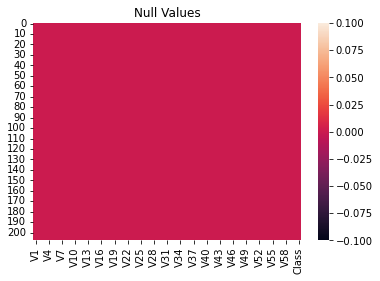

In [24]:
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

there are no null values.

# Target Variable

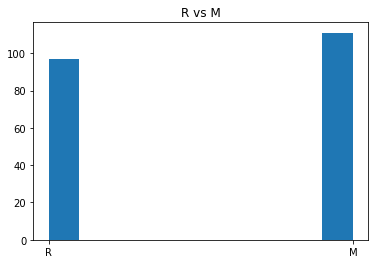

In [25]:
df['Class'].hist(grid=False)
plt.title("R vs M")
plt.show()

In [26]:
df["Class"].value_counts()

M    111
R     97
Name: Class, dtype: int64

In [27]:
df["Class"].value_counts(normalize=True)*100

M    53.365385
R    46.634615
Name: Class, dtype: float64

Label Encoding

label encoding ==> alphabetical order


label encoding is needed to convert rock and mine int 0 and 1 so that we can check correlation of target variable with other columns.

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le=LabelEncoder()
df['Class']=le.fit_transform(df['Class'])

In [30]:
df.Class.value_counts()

0    111
1     97
Name: Class, dtype: int64

In [31]:
le.inverse_transform([1,0])

array(['R', 'M'], dtype=object)

In [32]:
le.inverse_transform([0,1])

array(['M', 'R'], dtype=object)

In [33]:
df['Class'].value_counts()

0    111
1     97
Name: Class, dtype: int64

In [34]:
#checking correlation

df.corr()

V1        V2        V3        V4        V5        V6        V7  \
V1     1.000000  0.735896  0.571537  0.491438  0.344797  0.238921  0.260815   
V2     0.735896  1.000000  0.779916  0.606684  0.419669  0.332329  0.279040   
V3     0.571537  0.779916  1.000000  0.781786  0.546141  0.346275  0.190434   
V4     0.491438  0.606684  0.781786  1.000000  0.726943  0.352805  0.246440   
V5     0.344797  0.419669  0.546141  0.726943  1.000000  0.597053  0.335422   
V6     0.238921  0.332329  0.346275  0.352805  0.597053  1.000000  0.702889   
V7     0.260815  0.279040  0.190434  0.246440  0.335422  0.702889  1.000000   
V8     0.355523  0.334615  0.237884  0.246742  0.204006  0.471683  0.675774   
V9     0.353420  0.316733  0.252691  0.247078  0.177906  0.327578  0.470580   
V10    0.318276  0.270782  0.219637  0.237769  0.183219  0.288621  0.425448   
V11    0.344058  0.297065  0.274610  0.271881  0.231684  0.333570  0.396588   
V12    0.210861  0.194102  0.214807  0.175381  0.211657  0.344451  0.274432   
V13    0.210722  0.249596  0.258767  0.215754  0.299086  0.411107  0.365391   
V14    0.256278  0.273170  0.291724  0.286708  0.359062  0.396233  0.409576   
V15    0.304878  0.307599  0.285663  0.278529  0.318059  0.367908  0.411692   
V16    0.239079  0.261844  0.237017  0.248245  0.328725  0.353783  0.363086   
V17    0.137845  0.152170  0.201093  0.223203  0.326477  0.293190  0.250024   
V18    0.041817  0.042870  0.120587  0.194992  0.299266  0.235778  0.208057   
V19    0.055227  0.040911  0.099303  0.189405  0.340543  0.226305  0.215495   
V20    0.156760  0.102428  0.103117  0.188317  0.285737  0.206841  0.196496   
V21    0.117663  0.075255  0.063990  0.142271  0.205088  0.174768  0.165827   
V22   -0.056973 -0.074157 -0.026815  0.036010  0.152897  0.123770  0.063773   
V23   -0.163426 -0.179365 -0.073400 -0.029749  0.073934  0.064081  0.009359   
V24   -0.218093 -0.196469 -0.085380 -0.102975 -0.000624  0.027026  0.011982   
V25   -0.295683 -0.295302 -0.214256 -0.206673 -0.067296 -0.043280 -0.057147   
V26   -0.342865 -0.365749 -0.291974 -0.291357 -0.125675 -0.100309 -0.126074   
V27   -0.341703 -0.337046 -0.263111 -0.294749 -0.169618 -0.129094 -0.179526   
V28   -0.224340 -0.234386 -0.256674 -0.256074 -0.214692 -0.118645 -0.116848   
V29   -0.199099 -0.228490 -0.290728 -0.300476 -0.283863 -0.156081 -0.129694   
V30   -0.077430 -0.115301 -0.197493 -0.236602 -0.273350 -0.151186 -0.068142   
V31   -0.048370 -0.055862 -0.106198 -0.190086 -0.214336 -0.054136 -0.096945   
V32   -0.030444 -0.049683 -0.109895 -0.169987 -0.173485 -0.051934 -0.115871   
V33   -0.031939 -0.108272 -0.170671 -0.164651 -0.200586 -0.144391 -0.127052   
V34    0.031319 -0.004247 -0.099409 -0.083965 -0.140559 -0.070337 -0.077662   
V35    0.098118  0.115824  0.017053  0.015200 -0.086529 -0.028815 -0.015531   
V36    0.080722  0.132611  0.053070  0.039282 -0.073481 -0.023621  0.002979   
V37    0.119565  0.169186  0.107530  0.063486 -0.064617 -0.064798 -0.001376   
V38    0.209873  0.217494  0.130276  0.089887 -0.008620 -0.048745  0.065900   
V39    0.208371  0.186828  0.110499  0.089346  0.063408  0.030599  0.080942   
V40    0.099993  0.098350  0.074137  0.045141  0.061616  0.081119  0.112673   
V41    0.127313  0.188226  0.189047  0.145241  0.098832  0.075797  0.041071   
V42    0.213592  0.261345  0.233442  0.144693  0.125181  0.048763 -0.028720   
V43    0.206057  0.186368  0.113920  0.050629  0.063706  0.034380 -0.025727   
V44    0.157949  0.133018  0.071946 -0.008407  0.031575  0.048870  0.061404   
V45    0.279968  0.285716  0.180734  0.087824  0.089202  0.085468  0.110813   
V46    0.319354  0.304247  0.173649  0.080012  0.081964  0.029524  0.076537   
V47    0.230343  0.255797  0.179528  0.046109  0.041419  0.016640  0.098925   
V48    0.203234  0.265279  0.234896  0.121065  0.084435  0.067196  0.155221   
V49    0.247560  0.313995  0.223074  0.133294  0.088128  0.080729  0.194720   
V50    0.269287  0.245868  0.081096  0.077925  0.066751  0.0173

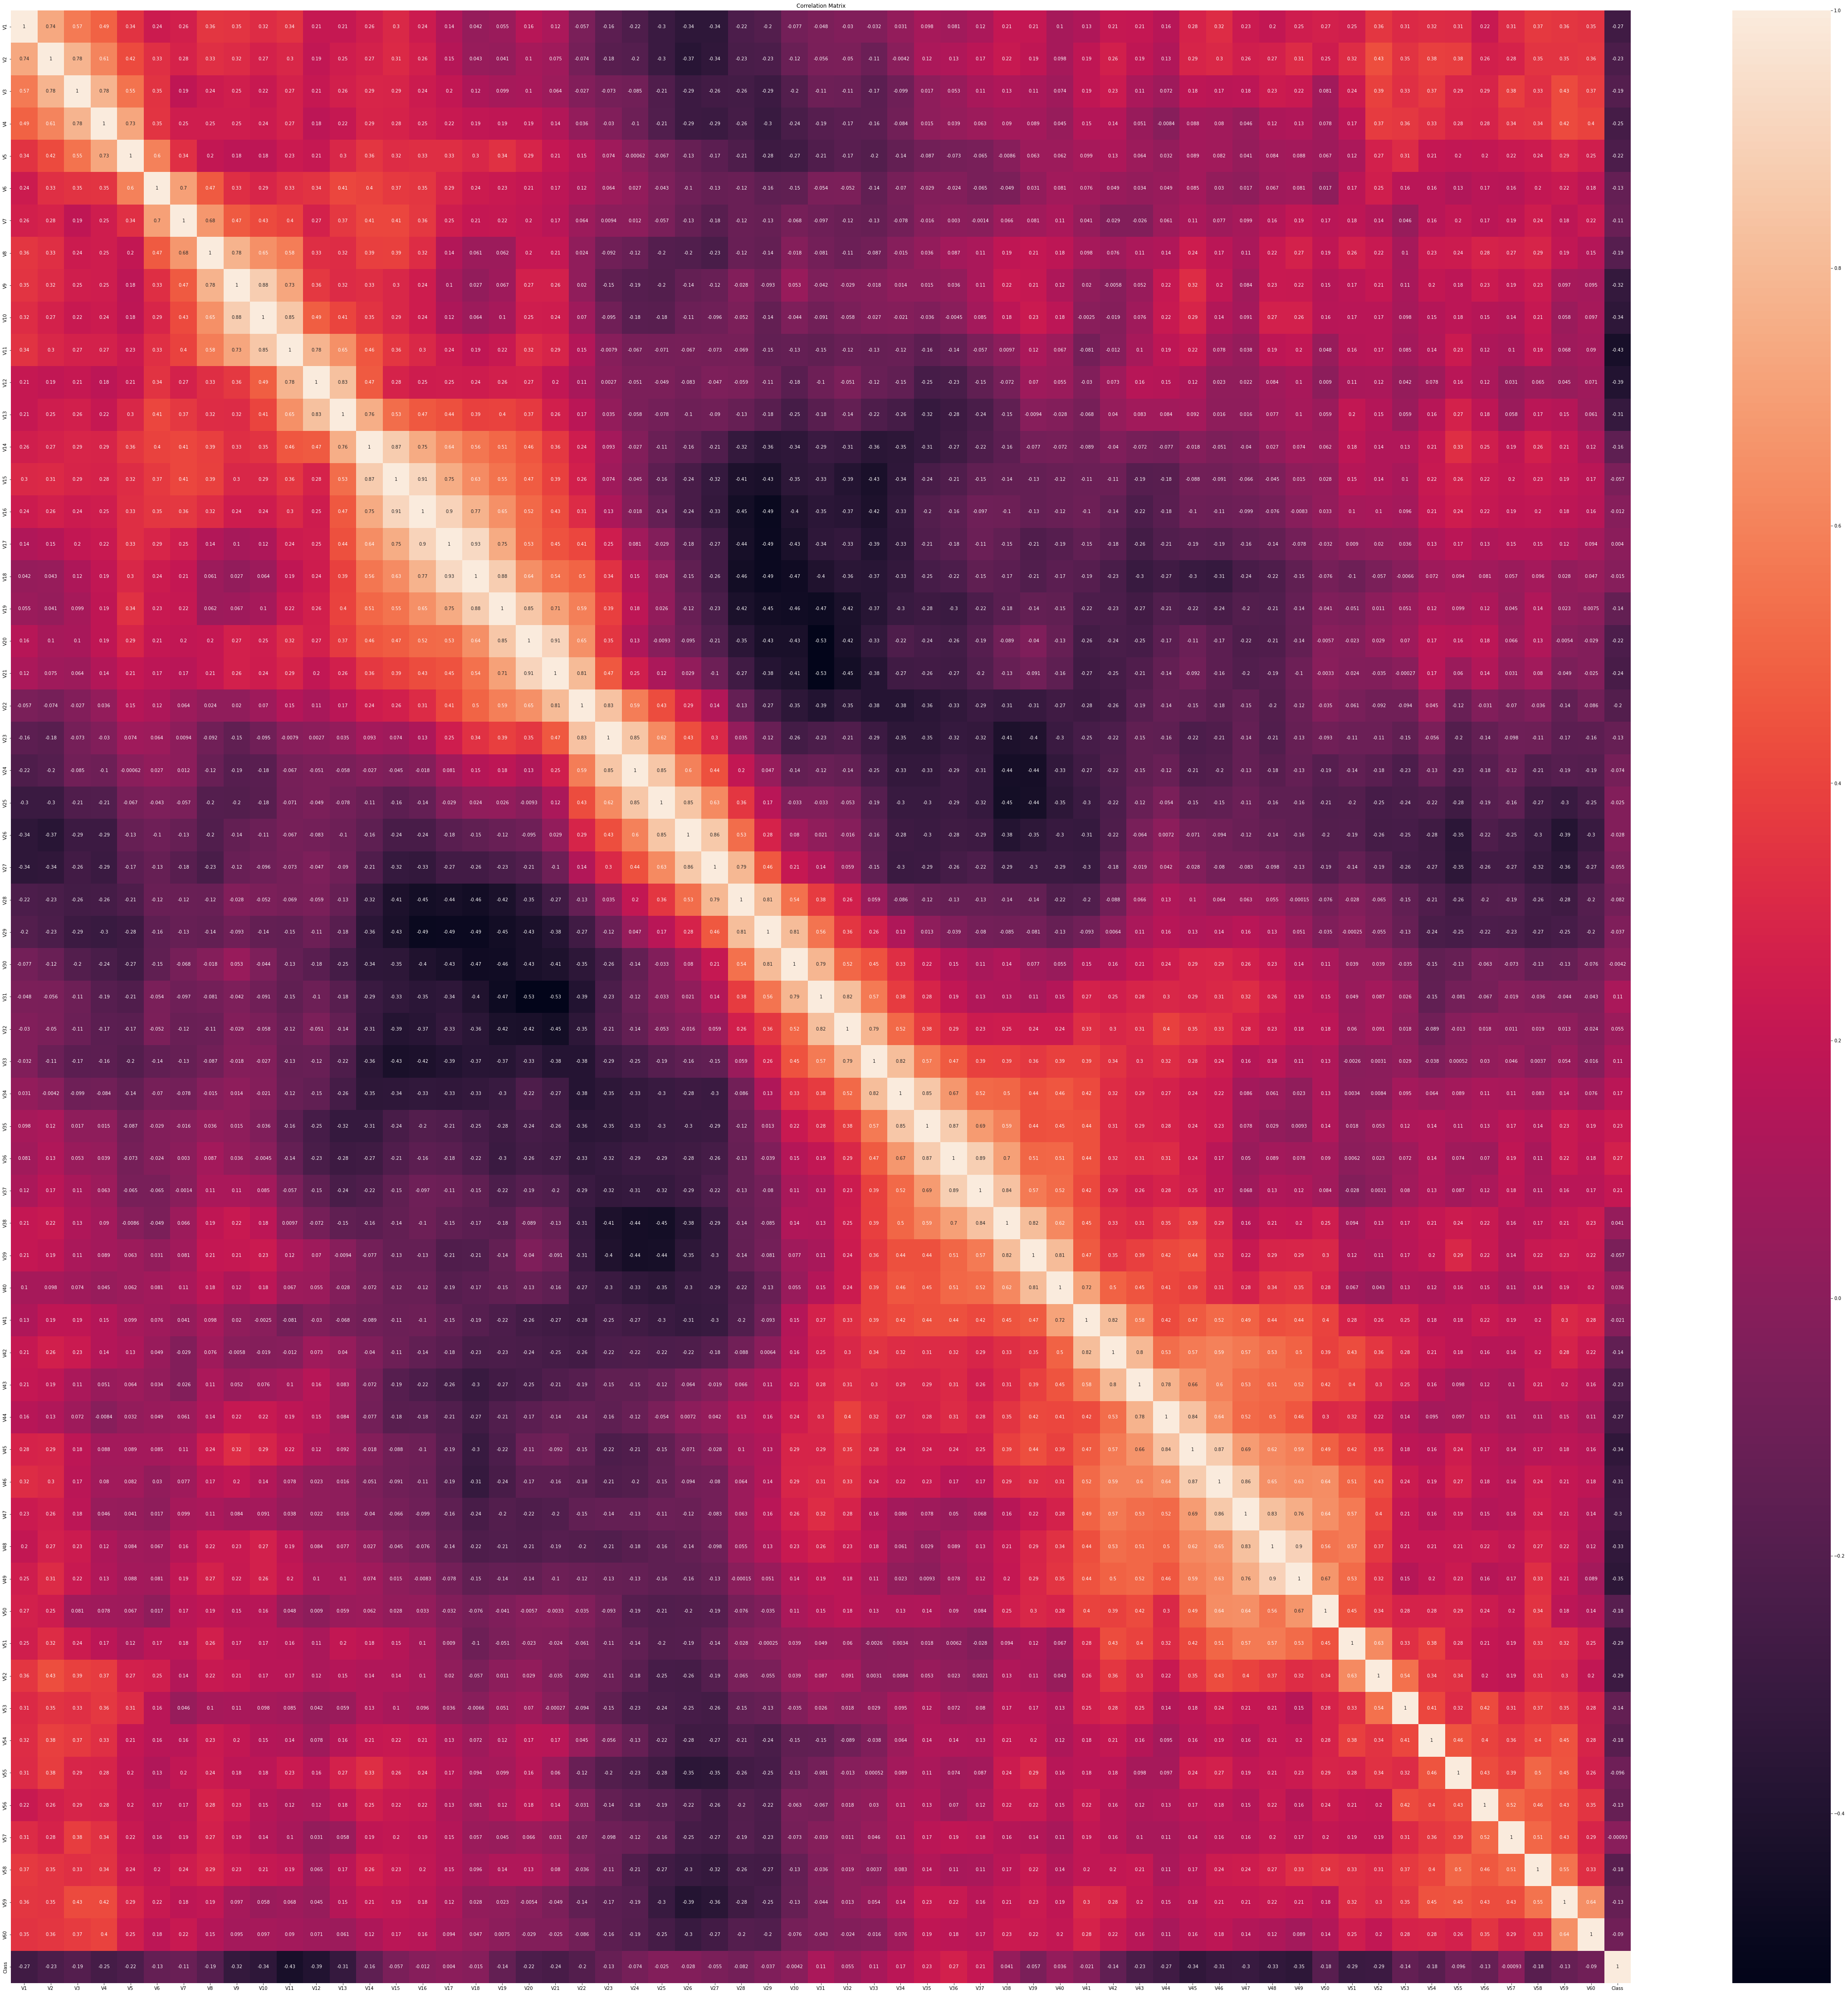

In [35]:
corr_mat=df.corr()

plt.figure(figsize=[80,80])

sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.savefig('correlationmatrix')
plt.show()

In [36]:
corr_matrix=df.corr()
corr_matrix['Class'].sort_values(ascending=False)

Class    1.000000
V36      0.269151
V35      0.227670
V37      0.209055
V34      0.172010
V31      0.110728
V33      0.107184
V32      0.055275
V38      0.040527
V40      0.035928
V17      0.003969
V57     -0.000933
V30     -0.004219
V16     -0.011581
V18     -0.014612
V41     -0.020942
V25     -0.025306
V26     -0.028063
V29     -0.036639
V27     -0.054997
V39     -0.056910
V15     -0.057318
V24     -0.074041
V28     -0.082486
V60     -0.090055
V55     -0.095639
V7      -0.114748
V23     -0.127413
V56     -0.129341
V59     -0.130826
V6      -0.132327
V19     -0.138204
V53     -0.141871
V42     -0.144147
V14     -0.157277
V50     -0.180224
V54     -0.182687
V58     -0.184191
V8      -0.189314
V3      -0.192195
V22     -0.201361
V5      -0.222232
V20     -0.224115
V2      -0.231238
V43     -0.234077
V21     -0.242755
V4      -0.250638
V1      -0.271694
V44     -0.273779
V52     -0.288651
V51     -0.293205
V47     -0.301697
V46     -0.305610
V13     -0.312811
V9      -0.321448
V48     -0

In [ ]:
Check the data distribution among all the columns.



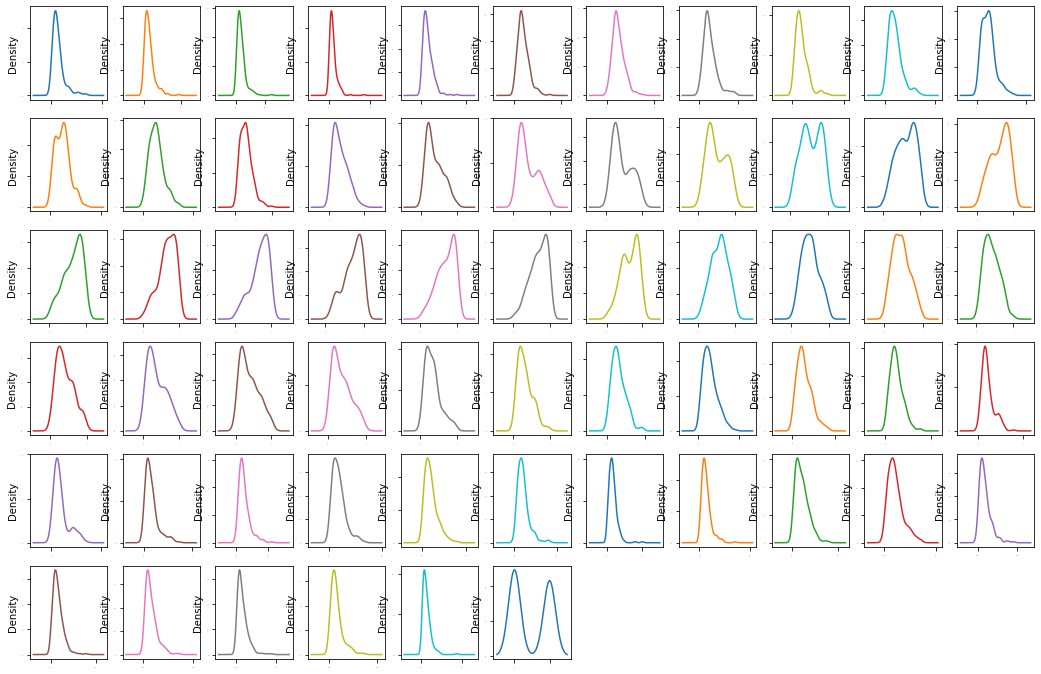

In [37]:
df.plot(kind='density',subplots=True,layout=(6,11),sharex=False,legend=False,fontsize=1,figsize=(18,12))
plt.show()

we can see skewness in data for multiple column.

Preprocessing

splitting independent and target variablein x and y before removing the skewness.

In [38]:
x=df.drop('Class',axis=1)
y=df['Class']

In [39]:
x

V1      V2      V3      V4      V5      V6      V7      V8      V9  \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
5    0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
6    0.0317  0.0956  0.1321  0.1408  0.1674  0.1710  0.0731  0.1401  0.2083   
7    0.0519  0.0548  0.0842  0.0319  0.1158  0.0922  0.1027  0.0613  0.1465   
8    0.0223  0.0375  0.0484  0.0475  0.0647  0.0591  0.0753  0.0098  0.0684   
9    0.0164  0.0173  0.0347  0.0070  0.0187  0.0671  0.1056  0.0697  0.0962   
10   0.0039  0.0063  0.0152  0.0336  0.0310  0.0284  0.0396  0.0272  0.0323   
11   0.0123  0.0309  0.0169  0.0313  0.0358  0.0102  0.0182  0.0579  0.1122   
12   0.0079  0.0086  0.0055  0.0250  0.0344  0.0546  0.0528  0.0958  0.1009   
13   0.0090  0.0062  0.0253  0.0489  0.1197  0.1589  0.1392  0.0987  0.0955   
14   0.0124  0.0433  0.0604  0.0449  0.0597  0.0355  0.0531  0.0343  0.1052   
15   0.0298  0.0615  0.0650  0.0921  0.1615  0.2294  0.2176  0.2033  0.1459   
16   0.0352  0.0116  0.0191  0.0469  0.0737  0.1185  0.1683  0.1541  0.1466   
17   0.0192  0.0607  0.0378  0.0774  0.1388  0.0809  0.0568  0.0219  0.1037   
18   0.0270  0.0092  0.0145  0.0278  0.0412  0.0757  0.1026  0.1138  0.0794   
19   0.0126  0.0149  0.0641  0.1732  0.2565  0.2559  0.2947  0.4110  0.4983   
20   0.0473  0.0509  0.0819  0.1252  0.1783  0.3070  0.3008  0.2362  0.3830   
21   0.0664  0.0575  0.0842  0.0372  0.0458  0.0771  0.0771  0.1130  0.2353   
22   0.0099  0.0484  0.0299  0.0297  0.0652  0.1077  0.2363  0.2385  0.0075   
23   0.0115  0.0150  0.0136  0.0076  0.0211  0.1058  0.1023  0.0440  0.0931   
24   0.0293  0.0644  0.0390  0.0173  0.0476  0.0816  0.0993  0.0315  0.0736   
25   0.0201  0.0026  0.0138  0.0062  0.0133  0.0151  0.0541  0.0210  0.0505   
26   0.0151  0.0320  0.0599  0.1050  0.1163  0.1734  0.1679  0.1119  0.0889   
27   0.0177  0.0300  0.0288  0.0394  0.0630  0.0526  0.0688  0.0633  0.0624   
28   0.0100  0.0275  0.0190  0.0371  0.0416  0.0201  0.0314  0.0651  0.1896   
29   0.0189  0.0308  0.0197  0.0622  0.0080  0.0789  0.1440  0.1451  0.1789   
30   0.0240  0.0218  0.0324  0.0569  0.0330  0.0513  0.0897  0.0713  0.0569   
31   0.0084  0.0153  0.0291  0.0432  0.0951  0.0752  0.0414  0.0259  0.0692   
32   0.0195  0.0213  0.0058  0.0190  0.0319  0.0571  0.1004  0.0668  0.0691   
33   0.0442  0.0477  0.0049  0.0581  0.0278  0.0678  0.1664  0.1490  0.0974   
34   0.0311  0.0491  0.0692  0.0831  0.0079  0.0200  0.0981  0.1016  0.2025   
35   0.0206  0.0132  0.0533  0.0569  0.0647  0.1432  0.1344  0.2041  0.1571   
36   0.0094  0.0166  0.0398  0.0359  0.0681  0.0706  0.1020  0.0893  0.0381   
37   0.0333  0.0221  0.0270  0.0481  0.0679  0.0981  0.0843  0.1172  0.0759   
38   0.0123  0.0022  0.0196  0.0206  0.0180  0.0492  0.0033  0.0398  0.0791   
39   0.0091  0.0213  0.0206  0.0505  0.0657  0.0795  0.0970  0.0872  0.0743   
40   0.0068  0.0232  0.0513  0.0444  0.0249  0.0637  0.0422  0.1130  0.1911   
41   0.0093  0.0185  0.0056  0.0064  0.0260  0.0458  0.0470  0.0057  0.0425   
42   0.0211  0.0319  0.0415  0.0286  0.0121  0.0438  0.1299  0.1390  0.0695   
43   0.0093  0.0269  0.0217  0.0339  0.0305  0.1172  0.1450  0.0638  0.0740   
44   0.0257  0.0447  0.0388  0.0239  0.1315  0.1323  0.1608  0.2145  0.0847   
45   0.0408  0.0653  0.0397  0.0604  0.0496  0.1817  0.1178  0.1024  0.0583   
46   0.0308  0.0339  0.0202  0.0889  0.1570  0.1750  0.0920  0.1353  0.1593   
47   0.0373  0.0281  0.0232  0.0225  0.0179  0.0733  0.0841  0.1031  0.0993   
48   0.0190  0.0038  0.0642  0.0452  0.0333  0.0690  0.0901  0.1454  0.0740   
49   0.0119  0.0582  0.0623  0.0600  0.1397  0.1883  0.1422

In [40]:
y

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     1
31     1
32     1
33     1
34     1
35     1
36     1
37     1
38     1
39     1
40     1
41     1
42     1
43     1
44     1
45     1
46     1
47     1
48     1
49     1
50     1
51     1
52     1
53     1
54     1
55     1
56     1
57     1
58     1
59     1
60     1
61     1
62     1
63     1
64     1
65     1
66     1
67     1
68     1
69     1
70     1
71     1
72     1
73     1
74     1
75     1
76     1
77     1
78     1
79     1
80     1
81     1
82     1
83     1
84     1
85     1
86     1
87     1
88     1
89     1
90     1
91     1
92     1
93     1
94     1
95     1
96     1
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

In [41]:
#checking Skewness
x.skew().sort_values(ascending=False)

V4     3.401697
V60    2.775754
V51    2.716060
V3     2.652518
V2     2.155644
V1     2.131088
V58    2.098330
V52    2.093976
V5     2.018141
V47    1.790155
V55    1.789946
V56    1.780805
V50    1.761714
V59    1.737506
V46    1.706674
V57    1.653090
V9     1.633870
V8     1.481107
V45    1.366839
V10    1.281258
V48    1.277722
V49    1.273385
V6     1.248166
V44    1.235086
V54    1.093090
V53    1.060572
V38    1.033366
V14    1.022369
V11    0.987813
V7     0.970820
V43    0.909317
V39    0.908835
V41    0.863526
V40    0.861280
V42    0.860110
V15    0.763964
V13    0.736584
V16    0.694671
V37    0.676994
V17    0.654480
V36    0.619868
V35    0.591654
V12    0.588681
V34    0.563296
V18    0.525845
V33    0.423864
V32    0.313420
V19    0.283182
V31    0.259797
V20   -0.085331
V30   -0.132390
V21   -0.252741
V22   -0.392289
V29   -0.442007
V23   -0.594350
V28   -0.615447
V27   -0.627843
V26   -0.671580
V24   -0.691861
V25   -0.788909
dtype: float64

In [ ]:
We can see skewness in most of columns of the dataset.we will remove skewness using power transform function.

In [42]:
from sklearn.preprocessing import power_transform,PowerTransformer

In [43]:
PowerTransformer()

PowerTransformer()

In [44]:
x_new=power_transform(x)

In [45]:
x_new

array([[-0.27559197,  0.27040028,  0.29141926, ...,  0.40035038,
         0.50276068, -0.77673576],
       [ 1.09332037,  0.80162153,  1.34753955, ..., -0.3971726 ,
        -0.3372011 , -0.33482801],
       [ 0.16435246,  0.96785776,  1.7063881 , ...,  1.45541497,
         0.59178889,  0.61276412],
       ...,
       [ 1.31612574,  0.52119085, -0.83388303, ...,  1.19851347,
         0.2498297 , -0.81661951],
       [ 0.41211554,  0.19596508,  0.50237865, ...,  0.30261849,
        -0.79598579, -0.20155368],
       [ 0.15144333,  0.23765441, -1.09243326, ..., -0.77133983,
        -0.10911474,  1.27854891]])

In [47]:
#checking skewness
pd.DataFrame(x_new,columns=x.columns).skew().sort_values(ascending=False)

V58    0.220689
V60    0.204745
V1     0.200661
V57    0.200251
V2     0.196446
V4     0.190002
V55    0.189057
V3     0.187103
V45    0.170784
V46    0.169289
V59    0.166418
V52    0.148282
V5     0.140451
V49    0.132635
V53    0.130364
V54    0.125757
V17    0.124196
V47    0.120549
V56    0.120513
V50    0.106623
V16    0.102740
V37    0.100569
V48    0.096302
V18    0.094088
V36    0.087954
V38    0.086653
V44    0.083057
V39    0.078671
V35    0.078044
V9     0.077245
V51    0.077191
V10    0.073024
V15    0.070344
V41    0.061931
V42    0.049309
V34    0.047734
V11    0.047685
V8     0.039388
V14    0.039062
V6     0.038764
V40    0.035032
V12    0.033161
V43    0.032043
V13    0.024720
V33    0.020193
V19    0.019011
V7     0.017842
V32    0.005106
V31   -0.001851
V30   -0.047004
V20   -0.074176
V21   -0.106673
V29   -0.133525
V22   -0.144238
V24   -0.163443
V28   -0.167409
V23   -0.180086
V27   -0.195002
V26   -0.202206
V25   -0.205760
dtype: float64

In [ ]:
(-0.22 to 0.22)

In [48]:
type(x_new)

numpy.ndarray

In [49]:
x_new.ndim

2

In [50]:
x.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41',
       'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51',
       'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60'],
      dtype='object')

In [51]:
x=pd.DataFrame(x_new,columns=x.columns)

In [52]:
x.skew().sort_values(ascending=False)

V58    0.220689
V60    0.204745
V1     0.200661
V57    0.200251
V2     0.196446
V4     0.190002
V55    0.189057
V3     0.187103
V45    0.170784
V46    0.169289
V59    0.166418
V52    0.148282
V5     0.140451
V49    0.132635
V53    0.130364
V54    0.125757
V17    0.124196
V47    0.120549
V56    0.120513
V50    0.106623
V16    0.102740
V37    0.100569
V48    0.096302
V18    0.094088
V36    0.087954
V38    0.086653
V44    0.083057
V39    0.078671
V35    0.078044
V9     0.077245
V51    0.077191
V10    0.073024
V15    0.070344
V41    0.061931
V42    0.049309
V34    0.047734
V11    0.047685
V8     0.039388
V14    0.039062
V6     0.038764
V40    0.035032
V12    0.033161
V43    0.032043
V13    0.024720
V33    0.020193
V19    0.019011
V7     0.017842
V32    0.005106
V31   -0.001851
V30   -0.047004
V20   -0.074176
V21   -0.106673
V29   -0.133525
V22   -0.144238
V24   -0.163443
V28   -0.167409
V23   -0.180086
V27   -0.195002
V26   -0.202206
V25   -0.205760
dtype: float64

Checking outliers

In [ ]:
There are 61 columns in dataset so it is not possible to plot each column seperately or plot all together also.So we will print in 2 steps.

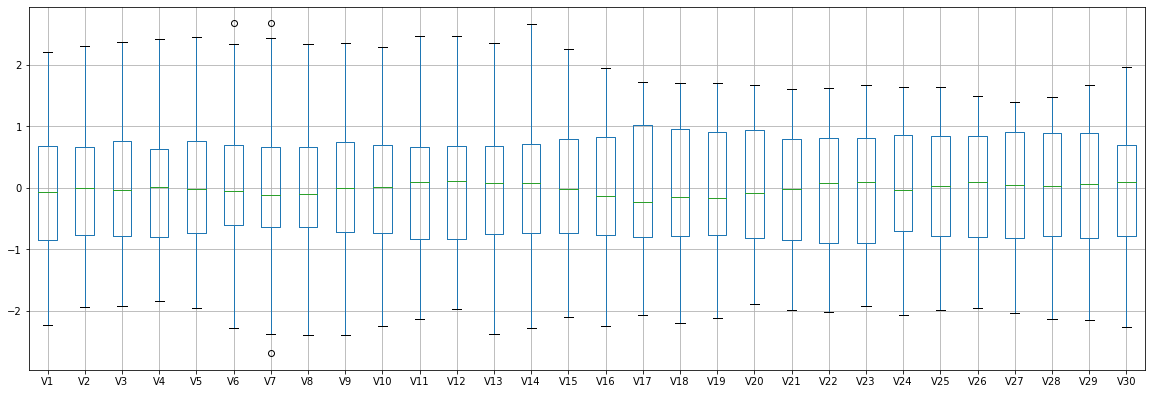

In [56]:
#plotting boxplot for first 30 columns
x.iloc[:,0:30].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()       

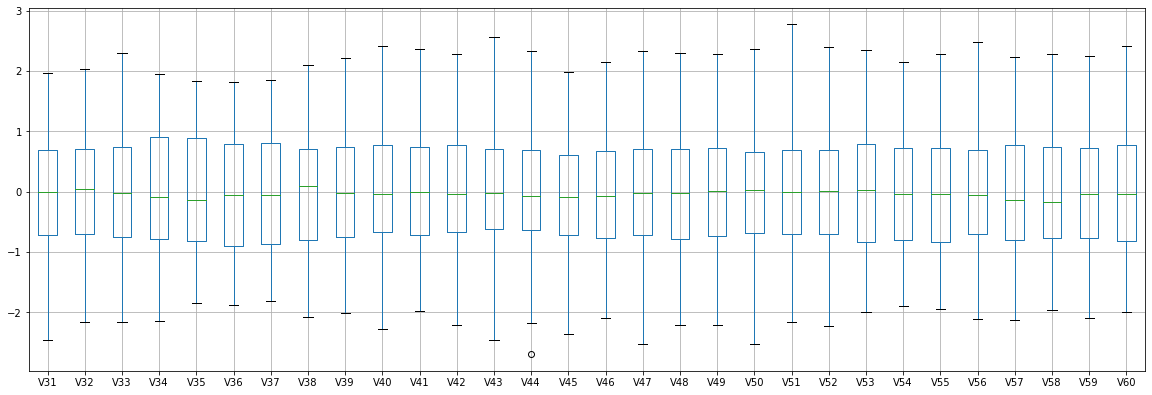

In [57]:
#plotting for rest of the column
x.iloc[:,30:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show() 

we can see one or two values for total 3 column but those are very near to whiskers so these are not outliers.

In [58]:
#quantify
from scipy.stats import zscore
np.abs(zscore(x)<3).all().all()

True

In [ ]:
no outliers present im my dataset.

In [59]:
#training
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [60]:
#best random state

max_acc=0
max_rs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predrf=lr.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    print('accuracy',acc,'random_state',i)
    
    if acc>max_acc:
        max_acc=acc
        max_rs=i
        print('max accuracy',max_acc,'max_random_state',i)

accuracy 0.7142857142857143 random_state 1
max accuracy 0.7142857142857143 max_random_state 1
accuracy 0.8333333333333334 random_state 2
max accuracy 0.8333333333333334 max_random_state 2
accuracy 0.7142857142857143 random_state 3
accuracy 0.8095238095238095 random_state 4
accuracy 0.7380952380952381 random_state 5
accuracy 0.7380952380952381 random_state 6
accuracy 0.7142857142857143 random_state 7
accuracy 0.7380952380952381 random_state 8
accuracy 0.8095238095238095 random_state 9
accuracy 0.7857142857142857 random_state 10
accuracy 0.7142857142857143 random_state 11
accuracy 0.8333333333333334 random_state 12
accuracy 0.7857142857142857 random_state 13
accuracy 0.9047619047619048 random_state 14
max accuracy 0.9047619047619048 max_random_state 14
accuracy 0.8333333333333334 random_state 15
accuracy 0.7142857142857143 random_state 16
accuracy 0.7380952380952381 random_state 17
accuracy 0.8095238095238095 random_state 18
accuracy 0.8095238095238095 random_state 19
accuracy 0.80952380

accuracy 0.6904761904761905 random_state 183
accuracy 0.7142857142857143 random_state 184
accuracy 0.8095238095238095 random_state 185
accuracy 0.7619047619047619 random_state 186
accuracy 0.8095238095238095 random_state 187
accuracy 0.7619047619047619 random_state 188
accuracy 0.8333333333333334 random_state 189
accuracy 0.6904761904761905 random_state 190
accuracy 0.7619047619047619 random_state 191
accuracy 0.8095238095238095 random_state 192
accuracy 0.7380952380952381 random_state 193
accuracy 0.6904761904761905 random_state 194
accuracy 0.8571428571428571 random_state 195
accuracy 0.7380952380952381 random_state 196
accuracy 0.8095238095238095 random_state 197
accuracy 0.9047619047619048 random_state 198
accuracy 0.8809523809523809 random_state 199


In [61]:
print('Best Accuracy is', max_acc,'on random_state ',max_rs)

Best Accuracy is 0.9523809523809523 on random_state  41


In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=41)

In [63]:
x_train.shape

(166, 60)

In [64]:
x_test.shape

(42, 60)

In [65]:
y_train.shape

(166,)

In [66]:
y_test.shape

(42,)

In [ ]:
Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print('Accuracy',accuracy_score,(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy <function accuracy_score at 0x000002AD4F5CC550> (112    0
38     1
30     1
66     1
14     1
63     1
204    0
49     1
9      1
61     1
55     1
194    0
168    0
41     1
158    0
156    0
29     1
42     1
193    0
101    0
185    0
137    0
190    0
51     1
117    0
11     1
56     1
171    0
144    0
173    0
71     1
138    0
147    0
106    0
22     1
176    0
121    0
174    0
201    0
207    0
54     1
119    0
Name: Class, dtype: int32, array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0]), 112    0
38     1
30     1
66     1
14     1
63     1
204    0
49     1
9      1
61     1
55     1
194    0
168    0
41     1
158    0
156    0
29     1
42     1
193    0
101    0
185    0
137    0
190    0
51     1
117    0
11     1
56     1
171    0
144    0
173    0
71     1
138    0
147    0
106    0
22     1
176    0
121    0
174    0
201    0
207    0
54     1
119    0
Name: Class, dtyp

In [ ]:
Decision Tree classifier

In [71]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
pred_train=dt.predict(x_train)
print('Accuracy',accuracy_score,(y_test,preddt)*100)
print('Training Accuracy',accuracy_score,(y_train,pred_train)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy <function accuracy_score at 0x000002AD4F5CC550> (112    0
38     1
30     1
66     1
14     1
63     1
204    0
49     1
9      1
61     1
55     1
194    0
168    0
41     1
158    0
156    0
29     1
42     1
193    0
101    0
185    0
137    0
190    0
51     1
117    0
11     1
56     1
171    0
144    0
173    0
71     1
138    0
147    0
106    0
22     1
176    0
121    0
174    0
201    0
207    0
54     1
119    0
Name: Class, dtype: int32, array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0]), 112    0
38     1
30     1
66     1
14     1
63     1
204    0
49     1
9      1
61     1
55     1
194    0
168    0
41     1
158    0
156    0
29     1
42     1
193    0
101    0
185    0
137    0
190    0
51     1
117    0
11     1
56     1
171    0
144    0
173    0
71     1
138    0
147    0
106    0
22     1
176    0
121    0
174    0
201    0
207    0
54     1
119    0
Name: Class, dtyp

Training Accuracy <function accuracy_score at 0x000002AD4F5CC550> (187    0
91     1
96     1
46     1
143    0
23     1
205    0
142    0
87     1
108    0
126    0
134    0
146    0
6      1
182    0
67     1
83     1
169    0
72     1
116    0
37     1
170    0
40     1
202    0
186    0
68     1
20     1
157    0
118    0
39     1
165    0
2      1
133    0
35     1
104    0
181    0
128    0
200    0
153    0
123    0
75     1
43     1
124    0
90     1
120    0
191    0
44     1
32     1
52     1
107    0
188    0
155    0
18     1
8      1
62     1
45     1
203    0
110    0
64     1
79     1
27     1
33     1
50     1
99     0
3      1
115    0
70     1
152    0
17     1
16     1
57     1
10     1
25     1
7      1
154    0
159    0
1      1
113    0
85     1
97     0
100    0
0      1
166    0
60     1
81     1
130    0
24     1
34     1
197    0
172    0
98     0
103    0
149    0
48     1
82     1
77     1
127    0
69     1
47     1
167    0
135    0
164    0
139    0
160   

In [ ]:
Random Forest Classifier

In [74]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('Accuracy',accuracy_score,(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy <function accuracy_score at 0x000002AD4F5CC550> (112    0
38     1
30     1
66     1
14     1
63     1
204    0
49     1
9      1
61     1
55     1
194    0
168    0
41     1
158    0
156    0
29     1
42     1
193    0
101    0
185    0
137    0
190    0
51     1
117    0
11     1
56     1
171    0
144    0
173    0
71     1
138    0
147    0
106    0
22     1
176    0
121    0
174    0
201    0
207    0
54     1
119    0
Name: Class, dtype: int32, array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]), 112    0
38     1
30     1
66     1
14     1
63     1
204    0
49     1
9      1
61     1
55     1
194    0
168    0
41     1
158    0
156    0
29     1
42     1
193    0
101    0
185    0
137    0
190    0
51     1
117    0
11     1
56     1
171    0
144    0
173    0
71     1
138    0
147    0
106    0
22     1
176    0
121    0
174    0
201    0
207    0
54     1
119    0
Name: Class, dtyp

In [ ]:
SVC

In [75]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print('Accuracy',accuracy_score,(y_test,predsvc)*100)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))


Accuracy <function accuracy_score at 0x000002AD4F5CC550> (112    0
38     1
30     1
66     1
14     1
63     1
204    0
49     1
9      1
61     1
55     1
194    0
168    0
41     1
158    0
156    0
29     1
42     1
193    0
101    0
185    0
137    0
190    0
51     1
117    0
11     1
56     1
171    0
144    0
173    0
71     1
138    0
147    0
106    0
22     1
176    0
121    0
174    0
201    0
207    0
54     1
119    0
Name: Class, dtype: int32, array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]), 112    0
38     1
30     1
66     1
14     1
63     1
204    0
49     1
9      1
61     1
55     1
194    0
168    0
41     1
158    0
156    0
29     1
42     1
193    0
101    0
185    0
137    0
190    0
51     1
117    0
11     1
56     1
171    0
144    0
173    0
71     1
138    0
147    0
106    0
22     1
176    0
121    0
174    0
201    0
207    0
54     1
119    0
Name: Class, dtyp

In [ ]:
cross validation

In [76]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lr,x,y,cv=9)
print('cross validation score of Logistic Regression model:',scr.mean())

cross validation score of Logistic Regression model: 0.7230273752012882


In [78]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dt,x,y,cv=7)
print('cross validation score of Decision tree classifier model:',scr.mean())

cross validation score of Decision tree classifier model: 0.5824302134646961


In [79]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rf,x,y,cv=9)
print('cross validation score of Random forest model:',scr.mean())

cross validation score of Random forest model: 0.7807971014492753


In [ ]:
Hyper parameter tuning

In [80]:
from sklearn.model_selection import GridSearchCV

parameters={'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8],
           'criterion':['gini','entropy'],
           'n_estimators':[100,200,300,400,500]}

In [81]:
gvc=GridSearchCV(estimator=RandomForestClassifier(),
                param_grid=parameters,
                cv=7,
                scoring='accuracy')

In [83]:
gvc.fit(x_train,y_train)
gvc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 100}

In [86]:
gvc.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8)

In [87]:
gvc_pred=gvc.best_estimator_.predict(x_test)
accuracy_score(y_test,gvc_pred)*100

92.85714285714286

In [ ]:
Roc AUC plot

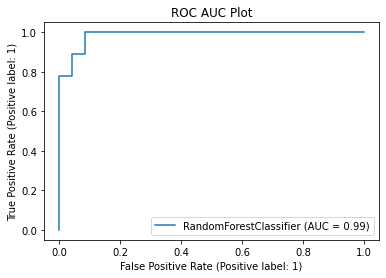

In [88]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gvc.best_estimator_,x_test,y_test)
plt.title('ROC AUC Plot')
plt.show()